In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [62]:
data = pd.read_csv('./terrorism.csv',encoding ='ISO-8859-1', low_memory = False)
pd.set_option('display.max_columns', None)
columns = ['iyear', 'imonth', 'country_txt', 'region_txt','propextent', 'propextent_txt','propvalue']
data = data[columns]

In [35]:
data.head(10)

,iyear,imonth,country_txt,region_txt,propextent,propextent_txt,propvalue
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,NaN,NaN
1,1970,0,Mexico,North America,NaN,NaN,NaN
2,1970,1,Philippines,Southeast Asia,NaN,NaN,NaN
3,1970,1,Greece,Western Europe,NaN,NaN,NaN
4,1970,1,Japan,East Asia,NaN,NaN,NaN
5,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN
6,1970,1,Uruguay,South America,NaN,NaN,NaN
7,1970,1,United States,North America,3.0,Minor (likely < $1 million),22500.0
8,1970,1,United States,North America,3.0,Minor (likely < $1 million),60000.0
9,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN


In [66]:
data = data[data['propextent']!= 4.0]
data['propextent']
data_no_na = data.dropna(subset = ['propextent'])
data_no_na.head(10)


,iyear,imonth,country_txt,region_txt,propextent,propextent_txt,propvalue
5,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN
7,1970,1,United States,North America,3.0,Minor (likely < $1 million),22500.0
8,1970,1,United States,North America,3.0,Minor (likely < $1 million),60000.0
9,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN
10,1970,1,United States,North America,3.0,Minor (likely < $1 million),0.0
11,1970,1,United States,North America,3.0,Minor (likely < $1 million),305.0
13,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN
14,1970,1,United States,North America,2.0,Major (likely >= $1 million but < $1 billion),2000000.0
17,1970,1,United States,North America,3.0,Minor (likely < $1 million),NaN
19,1970,1,United States,North America,3.0,Minor (likely < $1 million),17000.0


In [84]:
year_propex = data_no_na.groupby('iyear').mean()['propextent'].reset_index()

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(year_propex[['iyear']], year_propex['propextent'], test_size=0.3, random_state=68)

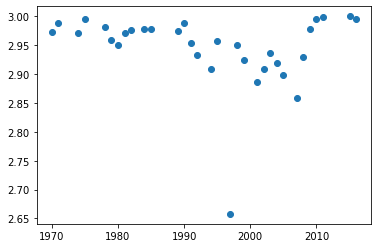

In [94]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()
plt.scatter(X_train, y_train)

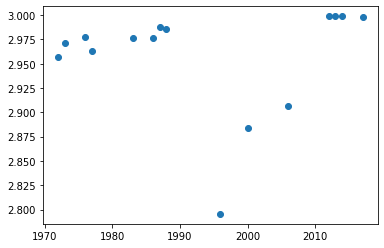

In [93]:
plt.scatter(X_test, y_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly,y_train)
y_train_pred = lm.predict(X_train_poly)
y_test_pred = lm.predict(X_test_poly)
print(lm.score(X_train_poly, y_train), lm.score(X_test_poly, y_test))

0.3112188656850522 0.4863225484286218


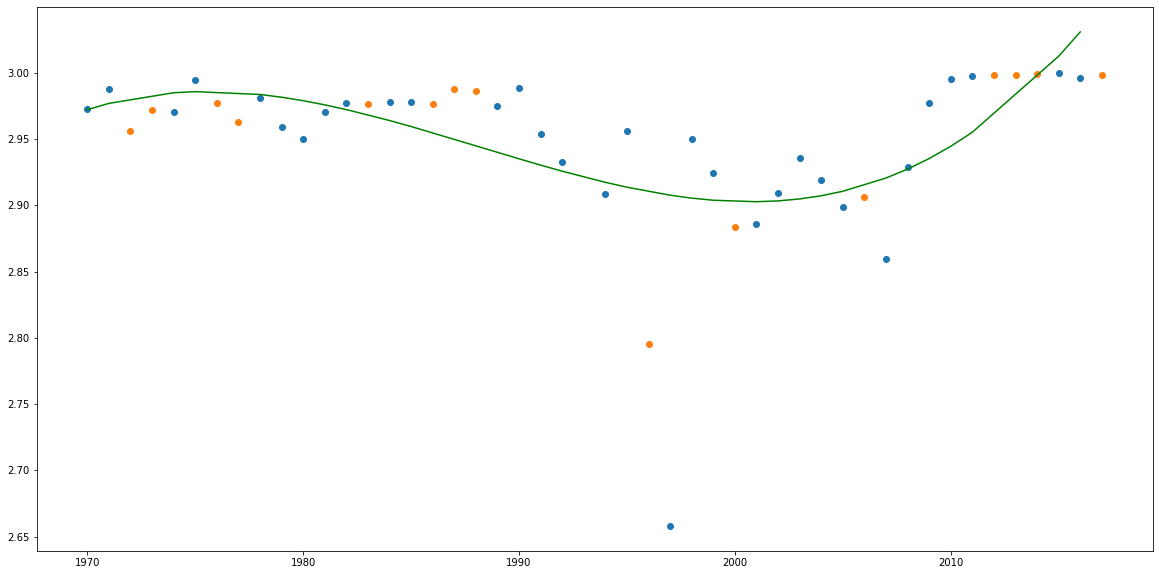

In [89]:
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train_pred, 'g-')
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()